In [58]:
import pandas as pd
from fastai.tabular.all import cont_cat_split
from fastai.tabular.all import *
from fast_tabnet.core import *

In [4]:
df = pd.read_csv("C:/Users/user8/Downloads/MGP Resources/patient_survival.csv")
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [5]:
df.info

<bound method DataFrame.info of        encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250

In [7]:
df["hospital_death"].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [8]:
tar_feature = "hospital_death"

In [13]:
cont_vars, cat_vars = cont_cat_split(df, dep_var=tar_feature)

In [15]:
df[cont_vars]

,encounter_id,patient_id,hospital_id,age,bmi,height,icu_id,pre_icu_los_days,weight,albumin_apache,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,68.0,22.730000,180.3,92,0.541667,73.9,2.3,...,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,77.0,27.420000,160.0,90,0.927778,70.2,NaN,...,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,119783,50777,118,25.0,31.950000,172.7,93,0.000694,95.3,NaN,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,81.0,22.640000,165.1,92,0.000694,61.7,NaN,...,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,19.0,NaN,188.0,91,0.073611,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,177.8,927,0.298611,72.9,NaN,...,0.12,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,66119,13486,121,56.0,47.179671,183.0,925,0.120139,158.0,NaN,...,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,8981,58179,195,48.0,27.236914,170.2,908,0.046528,78.9,2.9,...,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,33776,120598,66,NaN,23.297481,154.9,922,0.081944,55.9,NaN,...,0.07,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df[cont_vars].info

<bound method DataFrame.info of        encounter_id  patient_id  hospital_id   age        bmi  height  icu_id  \
0             66154       25312          118  68.0  22.730000   180.3      92   
1            114252       59342           81  77.0  27.420000   160.0      90   
2            119783       50777          118  25.0  31.950000   172.7      93   
3             79267       46918          118  81.0  22.640000   165.1      92   
4             92056       34377           33  19.0        NaN   188.0      91   
...             ...         ...          ...   ...        ...     ...     ...   
91708         91592       78108           30  75.0  23.060250   177.8     927   
91709         66119       13486          121  56.0  47.179671   183.0     925   
91710          8981       58179          195  48.0  27.236914   170.2     908   
91711         33776      120598           66   NaN  23.297481   154.9     922   
91712          1671       53612          104  82.0  22.031250   160.0     926

In [16]:
df[cat_vars]

,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,readmission_status,apache_post_operative,apache_3j_bodysystem,apache_2_bodysystem
0,0,Caucasian,M,Floor,Floor,admit,CTICU,0,0,Sepsis,Cardiovascular
1,0,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,0,0,Respiratory,Respiratory
2,0,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0,0,Metabolic,Metabolic
3,1,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,0,1,Cardiovascular,Cardiovascular
4,0,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,0,0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...
91708,0,Caucasian,M,Acute Care/Floor,Floor,admit,Cardiac ICU,0,0,Sepsis,Cardiovascular
91709,0,Caucasian,F,Emergency Department,Floor,admit,Med-Surg ICU,0,0,Sepsis,Cardiovascular
91710,0,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0,0,Metabolic,Metabolic
91711,0,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0,0,Respiratory,Respiratory


In [22]:
cont_vars.remove("encounter_id")

In [23]:
cont_vars.remove("patient_id")
cont_vars.remove("hospital_id")

In [29]:
cont_vars

['encounter_id',
 'patient_id',
 'hospital_id',
 'age',
 'bmi',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_

In [30]:
cat_vars

['elective_surgery',
 'ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'readmission_status',
 'apache_post_operative',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [32]:
df[cont_vars].nunique()

encounter_id                   91713
patient_id                     91713
hospital_id                      147
age                               74
bmi                            34888
                               ...  
hepatic_failure                    2
immunosuppression                  2
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
Length: 174, dtype: int64

In [33]:
df[cat_vars].nunique()

elective_surgery          2
ethnicity                 6
gender                    2
hospital_admit_source    15
icu_admit_source          5
icu_stay_type             3
icu_type                  8
readmission_status        1
apache_post_operative     2
apache_3j_bodysystem     11
apache_2_bodysystem      10
dtype: int64

# **Build the Model**

In [38]:
splits = RandomSplitter()(range_of(df))

In [48]:
T_Pandas = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = categorical_vars,
                   cont_names = continuous_vars,
                   y_names='hospital_death',
                   y_block=CategoryBlock(),
                   splits=splits)

c:\users\user8\appdata\local\programs\python\python38\lib\site-packages\fastai\tabular\core.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  to.loc[:,n+'_na'] = missing[n]
c:\users\user8\appdata\local\programs\python\python38\lib\site-packages\fastai\tabular\core.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  to.loc[:,n+'_na'] = missing[n]
c:\users\user8\appdata\local\programs\python\python38\lib\site-packages\fastai\tabular\core.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [49]:
T_Pandas.xs.iloc[:2]

,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,readmission_status,apache_post_operative,apache_3j_bodysystem,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
11592,2,3,1,9,3,1,4,1,2,1,...,-0.351961,-0.202266,-0.029777,-0.12602,-0.536068,-0.114898,-0.163399,-0.083829,-0.064396,-0.143876
88371,1,3,2,4,1,1,1,1,1,1,...,-0.140724,-0.105626,-0.029777,-0.12602,-0.536068,-0.114898,-0.163399,-0.083829,-0.064396,-0.143876


In [50]:
dls = T_Pandas.dataloaders(bs=2000)

In [51]:
dls.show_batch()

,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,readmission_status,apache_post_operative,apache_3j_bodysystem,apache_2_bodysystem,age_na,bmi_na,height_na,weight_na,albumin_apache_na,apache_2_diagnosis_na,apache_3j_diagnosis_na,arf_apache_na,bilirubin_apache_na,bun_apache_na,creatinine_apache_na,fio2_apache_na,gcs_eyes_apache_na,gcs_motor_apache_na,gcs_unable_apache_na,gcs_verbal_apache_na,glucose_apache_na,heart_rate_apache_na,hematocrit_apache_na,intubated_apache_na,map_apache_na,paco2_apache_na,paco2_for_ph_apache_na,pao2_apache_na,ph_apache_na,resprate_apache_na,sodium_apache_na,temp_apache_na,urineoutput_apache_na,ventilated_apache_na,wbc_apache_na,d1_diasbp_invasive_max_na,d1_diasbp_invasive_min_na,d1_diasbp_max_na,d1_diasbp_min_na,d1_diasbp_noninvasive_max_na,d1_diasbp_noninvasive_min_na,d1_heartrate_max_na,d1_heartrate_min_na,d1_mbp_invasive_max_na,d1_mbp_invasive_min_na,d1_mbp_max_na,d1_mbp_min_na,d1_mbp_noninvasive_max_na,d1_mbp_noninvasive_min_na,d1_resprate_max_na,d1_resprate_min_na,d1_spo2_max_na,d1_spo2_min_na,d1_sysbp_invasive_max_na,d1_sysbp_invasive_min_na,d1_sysbp_max_na,d1_sysbp_min_na,d1_sysbp_noninvasive_max_na,d1_sysbp_noninvasive_min_na,d1_temp_max_na,d1_temp_min_na,h1_diasbp_invasive_max_na,h1_diasbp_invasive_min_na,h1_diasbp_max_na,h1_diasbp_min_na,h1_diasbp_noninvasive_max_na,h1_diasbp_noninvasive_min_na,h1_heartrate_max_na,h1_heartrate_min_na,h1_mbp_invasive_max_na,h1_mbp_invasive_min_na,h1_mbp_max_na,h1_mbp_min_na,h1_mbp_noninvasive_max_na,h1_mbp_noninvasive_min_na,h1_resprate_max_na,h1_resprate_min_na,h1_spo2_max_na,h1_spo2_min_na,h1_sysbp_invasive_max_na,h1_sysbp_invasive_min_na,h1_sysbp_max_na,h1_sysbp_min_na,h1_sysbp_noninvasive_max_na,h1_sysbp_noninvasive_min_na,h1_temp_max_na,h1_temp_min_na,d1_albumin_max_na,d1_albumin_min_na,d1_bilirubin_max_na,d1_bilirubin_min_na,d1_bun_max_na,d1_bun_min_na,d1_calcium_max_na,d1_calcium_min_na,d1_creatinine_max_na,d1_creatinine_min_na,d1_glucose_max_na,d1_glucose_min_na,d1_hco3_max_na,d1_hco3_min_na,d1_hemaglobin_max_na,d1_hemaglobin_min_na,d1_hematocrit_max_na,d1_hematocrit_min_na,d1_inr_max_na,d1_inr_min_na,d1_lactate_max_na,d1_lactate_min_na,d1_platelets_max_na,d1_platelets_min_na,d1_potassium_max_na,d1_potassium_min_na,d1_sodium_max_na,d1_sodium_min_na,d1_wbc_max_na,d1_wbc_min_na,h1_albumin_max_na,h1_albumin_min_na,h1_bilirubin_max_na,h1_bilirubin_min_na,h1_bun_max_na,h1_bun_min_na,h1_calcium_max_na,h1_calcium_min_na,h1_creatinine_max_na,h1_creatinine_min_na,h1_glucose_max_na,h1_glucose_min_na,h1_hco3_max_na,h1_hco3_min_na,h1_hemaglobin_max_na,h1_hemaglobin_min_na,h1_hematocrit_max_na,h1_hematocrit_min_na,h1_inr_max_na,h1_inr_min_na,h1_lactate_max_na,h1_lactate_min_na,h1_platelets_max_na,h1_platelets_min_na,h1_potassium_max_na,h1_potassium_min_na,h1_sodium_max_na,h1_sodium_min_na,h1_wbc_max_na,h1_wbc_min_na,d1_arterial_pco2_max_na,d1_arterial_pco2_min_na,d1_arterial_ph_max_na,d1_arterial_ph_min_na,d1_arterial_po2_max_na,d1_arterial_po2_min_na,d1_pao2fio2ratio_max_na,d1_pao2fio2ratio_min_na,h1_arterial_pco2_max_na,h1_arterial_pco2_min_na,h1_arterial_ph_max_na,h1_arterial_ph_min_na,h1_arterial_po2_max_na,h1_arterial_po2_min_na,h1_pao2fio2ratio_max_na,h1_pao2fio2ratio_min_na,apache_4a_hospital_death_prob_na,apache_4a_icu_death_prob_na,aids_na,cirrhosis_na,diabetes_mellitus_na,hepatic_failure_na,immunosuppression_na,leukemia_na,lymphoma_na,solid_tumor_with_metastasis_na,age,bmi,height,icu_id,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninv

In [52]:
dls.valid.show_batch()

,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,readmission_status,apache_post_operative,apache_3j_bodysystem,apache_2_bodysystem,age_na,bmi_na,height_na,weight_na,albumin_apache_na,apache_2_diagnosis_na,apache_3j_diagnosis_na,arf_apache_na,bilirubin_apache_na,bun_apache_na,creatinine_apache_na,fio2_apache_na,gcs_eyes_apache_na,gcs_motor_apache_na,gcs_unable_apache_na,gcs_verbal_apache_na,glucose_apache_na,heart_rate_apache_na,hematocrit_apache_na,intubated_apache_na,map_apache_na,paco2_apache_na,paco2_for_ph_apache_na,pao2_apache_na,ph_apache_na,resprate_apache_na,sodium_apache_na,temp_apache_na,urineoutput_apache_na,ventilated_apache_na,wbc_apache_na,d1_diasbp_invasive_max_na,d1_diasbp_invasive_min_na,d1_diasbp_max_na,d1_diasbp_min_na,d1_diasbp_noninvasive_max_na,d1_diasbp_noninvasive_min_na,d1_heartrate_max_na,d1_heartrate_min_na,d1_mbp_invasive_max_na,d1_mbp_invasive_min_na,d1_mbp_max_na,d1_mbp_min_na,d1_mbp_noninvasive_max_na,d1_mbp_noninvasive_min_na,d1_resprate_max_na,d1_resprate_min_na,d1_spo2_max_na,d1_spo2_min_na,d1_sysbp_invasive_max_na,d1_sysbp_invasive_min_na,d1_sysbp_max_na,d1_sysbp_min_na,d1_sysbp_noninvasive_max_na,d1_sysbp_noninvasive_min_na,d1_temp_max_na,d1_temp_min_na,h1_diasbp_invasive_max_na,h1_diasbp_invasive_min_na,h1_diasbp_max_na,h1_diasbp_min_na,h1_diasbp_noninvasive_max_na,h1_diasbp_noninvasive_min_na,h1_heartrate_max_na,h1_heartrate_min_na,h1_mbp_invasive_max_na,h1_mbp_invasive_min_na,h1_mbp_max_na,h1_mbp_min_na,h1_mbp_noninvasive_max_na,h1_mbp_noninvasive_min_na,h1_resprate_max_na,h1_resprate_min_na,h1_spo2_max_na,h1_spo2_min_na,h1_sysbp_invasive_max_na,h1_sysbp_invasive_min_na,h1_sysbp_max_na,h1_sysbp_min_na,h1_sysbp_noninvasive_max_na,h1_sysbp_noninvasive_min_na,h1_temp_max_na,h1_temp_min_na,d1_albumin_max_na,d1_albumin_min_na,d1_bilirubin_max_na,d1_bilirubin_min_na,d1_bun_max_na,d1_bun_min_na,d1_calcium_max_na,d1_calcium_min_na,d1_creatinine_max_na,d1_creatinine_min_na,d1_glucose_max_na,d1_glucose_min_na,d1_hco3_max_na,d1_hco3_min_na,d1_hemaglobin_max_na,d1_hemaglobin_min_na,d1_hematocrit_max_na,d1_hematocrit_min_na,d1_inr_max_na,d1_inr_min_na,d1_lactate_max_na,d1_lactate_min_na,d1_platelets_max_na,d1_platelets_min_na,d1_potassium_max_na,d1_potassium_min_na,d1_sodium_max_na,d1_sodium_min_na,d1_wbc_max_na,d1_wbc_min_na,h1_albumin_max_na,h1_albumin_min_na,h1_bilirubin_max_na,h1_bilirubin_min_na,h1_bun_max_na,h1_bun_min_na,h1_calcium_max_na,h1_calcium_min_na,h1_creatinine_max_na,h1_creatinine_min_na,h1_glucose_max_na,h1_glucose_min_na,h1_hco3_max_na,h1_hco3_min_na,h1_hemaglobin_max_na,h1_hemaglobin_min_na,h1_hematocrit_max_na,h1_hematocrit_min_na,h1_inr_max_na,h1_inr_min_na,h1_lactate_max_na,h1_lactate_min_na,h1_platelets_max_na,h1_platelets_min_na,h1_potassium_max_na,h1_potassium_min_na,h1_sodium_max_na,h1_sodium_min_na,h1_wbc_max_na,h1_wbc_min_na,d1_arterial_pco2_max_na,d1_arterial_pco2_min_na,d1_arterial_ph_max_na,d1_arterial_ph_min_na,d1_arterial_po2_max_na,d1_arterial_po2_min_na,d1_pao2fio2ratio_max_na,d1_pao2fio2ratio_min_na,h1_arterial_pco2_max_na,h1_arterial_pco2_min_na,h1_arterial_ph_max_na,h1_arterial_ph_min_na,h1_arterial_po2_max_na,h1_arterial_po2_min_na,h1_pao2fio2ratio_max_na,h1_pao2fio2ratio_min_na,apache_4a_hospital_death_prob_na,apache_4a_icu_death_prob_na,aids_na,cirrhosis_na,diabetes_mellitus_na,hepatic_failure_na,immunosuppression_na,leukemia_na,lymphoma_na,solid_tumor_with_metastasis_na,age,bmi,height,icu_id,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninv

In [53]:
learn = tabular_learner(dls, layers=[400,300,200], wd=0.01, train_bn=True, metrics=[accuracy])

In [54]:
learn.fine_tune(10,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.583726,0.483320,0.904154,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.470739,0.457931,0.899793,00:06
1,0.432068,0.384825,0.913423,00:06
2,0.367050,0.292394,0.918384,00:06
3,0.290520,0.262209,0.926998,00:06
4,0.225794,0.264517,0.925199,00:06
5,0.171713,0.259271,0.920510,00:06
6,0.130424,0.265333,0.925144,00:06
7,0.099601,0.271696,0.923400,00:06
8,0.079111,0.276058,0.924000,00:06
9,0.067372,0.272882,0.924054,00:06


SuggestedLRs(valley=9.999999747378752e-06)

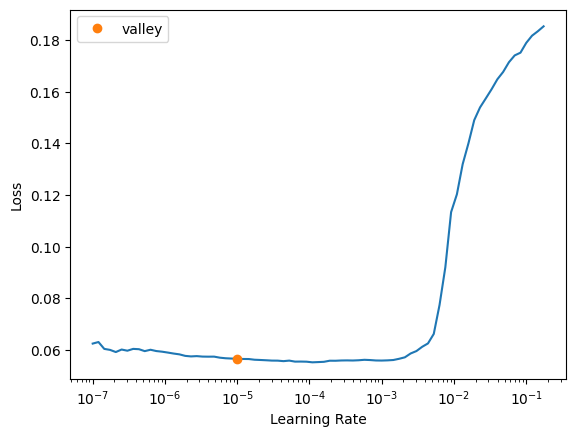

In [55]:
learn.lr_find()

In [56]:
learn.fit_one_cycle(10,lr_max=3e-7)

epoch,train_loss,valid_loss,accuracy,time
0,0.056387,0.278073,0.923454,00:06
1,0.056177,0.276096,0.923891,00:08
2,0.056078,0.271668,0.923945,00:06
3,0.056329,0.273827,0.923782,00:06
4,0.056126,0.273516,0.923618,00:06
5,0.056212,0.274422,0.923618,00:06
6,0.056421,0.276920,0.924000,00:06
7,0.056273,0.278460,0.923400,00:07
8,0.056125,0.271014,0.924163,00:07
9,0.056201,0.276488,0.924054,00:07


In [57]:
learn.export("C:/Users/user8/Downloads/MGP Resources/Project 4/models/patient_srvl_model.pkl")